In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [2]:
connex = sqlite3.connect('database.sqlite')
cur = connex.cursor()

In [3]:
loanbook = pd.read_sql_query('select * from loan;', connex)

In [4]:
loanbook.isnull().any()

index                          False
id                             False
member_id                       True
loan_amnt                       True
funded_amnt                     True
funded_amnt_inv                 True
term                            True
int_rate                        True
installment                     True
grade                           True
sub_grade                       True
emp_title                       True
emp_length                      True
home_ownership                  True
annual_inc                      True
verification_status             True
issue_d                         True
loan_status                     True
pymnt_plan                      True
url                             True
desc                            True
purpose                         True
title                           True
zip_code                        True
addr_state                      True
dti                             True
delinq_2yrs                     True
e

In [5]:
loanbook = loanbook.fillna(method='ffill')

In [6]:
loanbook['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'], dtype=object)

In [7]:
loanbook['loan_status'].describe()

count      887383
unique         10
top       Current
freq       601781
Name: loan_status, dtype: object

In [8]:
d = {'Current': True, 'Fully Paid':True, 'Charged Off': False, 'Default':False, 'Late (31-120 days)':False, 'In Grace Period':False, 'Late (16-30 days)':False, 'Does not meet the credit policy. Status:Fully Paid':True, 'Does not meet the credit policy. Status:Charged Off':False, None:False, 'Issued':True }

In [9]:
loan_stat = loanbook['loan_status'].map(d)

In [10]:
loan_stat.describe()

count     887383
unique         2
top         True
freq      819954
Name: loan_status, dtype: object

In [11]:
loanbook['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [12]:
w = {'OWN': True, 'MORTGAGE':True, 'RENT': False, 'OTHER':False, 'NONE':False, 'RENT':False, None:False, 'ANY':False }

In [13]:
home_own = loanbook['home_ownership'].map(w)

In [14]:
testval = pd.concat([loanbook['annual_inc'],loanbook['dti']], ignore_index=True, axis=1)

In [15]:
testval.describe()

,0,1
count,8.873830e+05,887383.000000
mean,7.502748e+04,18.157016
std,6.469811e+04,17.190591
min,0.000000e+00,0.000000
25%,4.500000e+04,11.910000
50%,6.500000e+04,17.650000
75%,9.000000e+04,23.950000
max,9.500000e+06,9999.000000


In [16]:
testval.columns = ['annual_income', 'dti']
testval.describe()

,annual_income,dti
count,8.873830e+05,887383.000000
mean,7.502748e+04,18.157016
std,6.469811e+04,17.190591
min,0.000000e+00,0.000000
25%,4.500000e+04,11.910000
50%,6.500000e+04,17.650000
75%,9.000000e+04,23.950000
max,9.500000e+06,9999.000000


In [37]:
loans_x_train, loans_x_test, loans_y_train, loans_y_test = train_test_split(testval, loan_stat, test_size = .33, random_state=42)

In [38]:
regr = linear_model.LinearRegression()

In [39]:
loans_x_train.describe()

,annual_income,dti
count,5.945460e+05,594546.000000
mean,7.504869e+04,18.141288
std,6.321379e+04,8.485663
min,1.200000e+03,0.000000
25%,4.500000e+04,11.920000
50%,6.500000e+04,17.650000
75%,9.000000e+04,23.950000
max,9.500000e+06,1092.520000


In [40]:
loans_y_train.describe()

count     594546
unique         2
top         True
freq      549245
Name: loan_status, dtype: object

In [21]:
loans_x_test.describe()

,annual_income,dti
count,2.928370e+05,292837.000000
mean,7.505913e+04,18.138626
std,6.595890e+04,8.395396
min,1.200000e+03,0.000000
25%,4.500000e+04,11.920000
50%,6.500000e+04,17.660000
75%,9.000000e+04,23.960000
max,9.500000e+06,672.520000


In [22]:
loans_y_test.describe()

count     292837
unique         2
top         True
freq      270556
Name: loan_status, dtype: object

In [41]:
regr.fit(loans_x_train, loans_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f" % np.mean((regr.predict(loans_x_train) - loans_y_train) * 2 ))

Coefficients: 
 [  1.34709817e-07  -4.67814192e-04]
Mean squared error: 0.00


In [43]:
print('Variance score: %.2f' % regr.score(loans_x_test, loans_y_test))

Variance score: -0.00


ValueError: x and y must be the same size

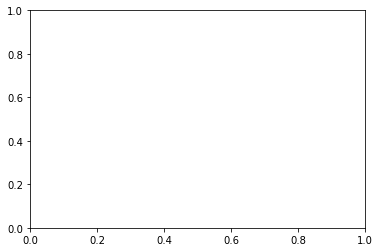

In [26]:
plt.scatter(loans_x_test, loans_y_test, color='black')

In [ ]:
loans_x_train.describe()

In [ ]:
loans_y_train.describe()

In [27]:
interest_r = loanbook['int_rate'].map(lambda x: float(x.rstrip('%')))
interest_r.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [32]:
intloan_x_train, intloan_x_test, intloan_y_train, intloan_y_test = train_test_split(testval, interest_r, test_size = .33, random_state=42)

In [33]:
regp = linear_model.LinearRegression()
regp.fit(intloan_x_train, intloan_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
print('Coefficients: \n', regp.coef_)
print('Mean squared error: %.2f' % np.mean((regp.predict(intloan_x_test)-intloan_y_test)*2))

Coefficients: 
 [ -3.29205027e-06   7.86844984e-02]
Mean squared error: 0.00


In [35]:
print('Variance score: %.2f' % regp.score(intloan_x_test, intloan_y_test))

Variance score: -0.19


ValueError: x and y must be the same size

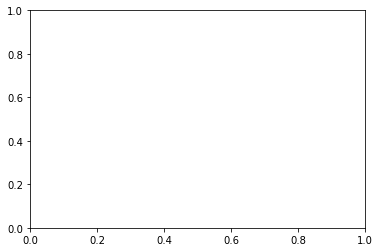

In [36]:
plt.scatter(intloan_x_test, intloan_y_test, color='black')
plt.plot(intloan_x_test, regp.predict(intloan_x_test), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
intloan_y_test.describe()